# Diabetes EDA

### Questions
1. Give me the distribution of Insulin feature
2. Is imputation required for the features in the given dataset ?
3. If yes, then for what features and how will you do it ?
4. Creation of Boxplot and detection of outliers. Which feature has maximum outliers ?
5. Is these records are balance or imbalance to deal with classification task. Create a bar plot for the same
6. Create a correlation matrix and talk about highly correlated features.

### Import neccessary libraries

In [30]:
import numpy as np
import pandas as pd
# to handle warnings
import warnings as w
w.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('C:/Users/manoharan/Documents/Study/Geeks for Geeks/Practice datasets/diabetes.csv')

In [4]:
df.shape

(768, 9)

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Q1. Give me the distribution of Insulin feature

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

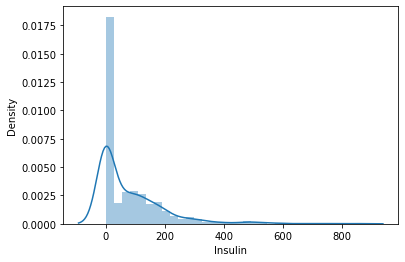

In [31]:

sns.distplot(df['Insulin'])

### Answer : 
#### The Insulin feature is right skwed.

#### Q2. Is imputation required for the features in the given dataset ?

In [21]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Answer : 
#### From the observation, we can able to find that no missing values found. And once we deep dive using the domain                knowledge there are features with values '0' which is not identical. So, we need imputation on the following features
              [Glucose, BloodPressure, SkinThickness, Insulin, BMI]

#### Q3. If yes, then for what features and how will you do it ?

#### List of features: 
Glucose, BloodPressure, SkinThickness, Insulin, BMI

Step 1 : We need to plot the features to find its ditribution. Based on the distrbution we can then identify the possible 
         method and values to impute.

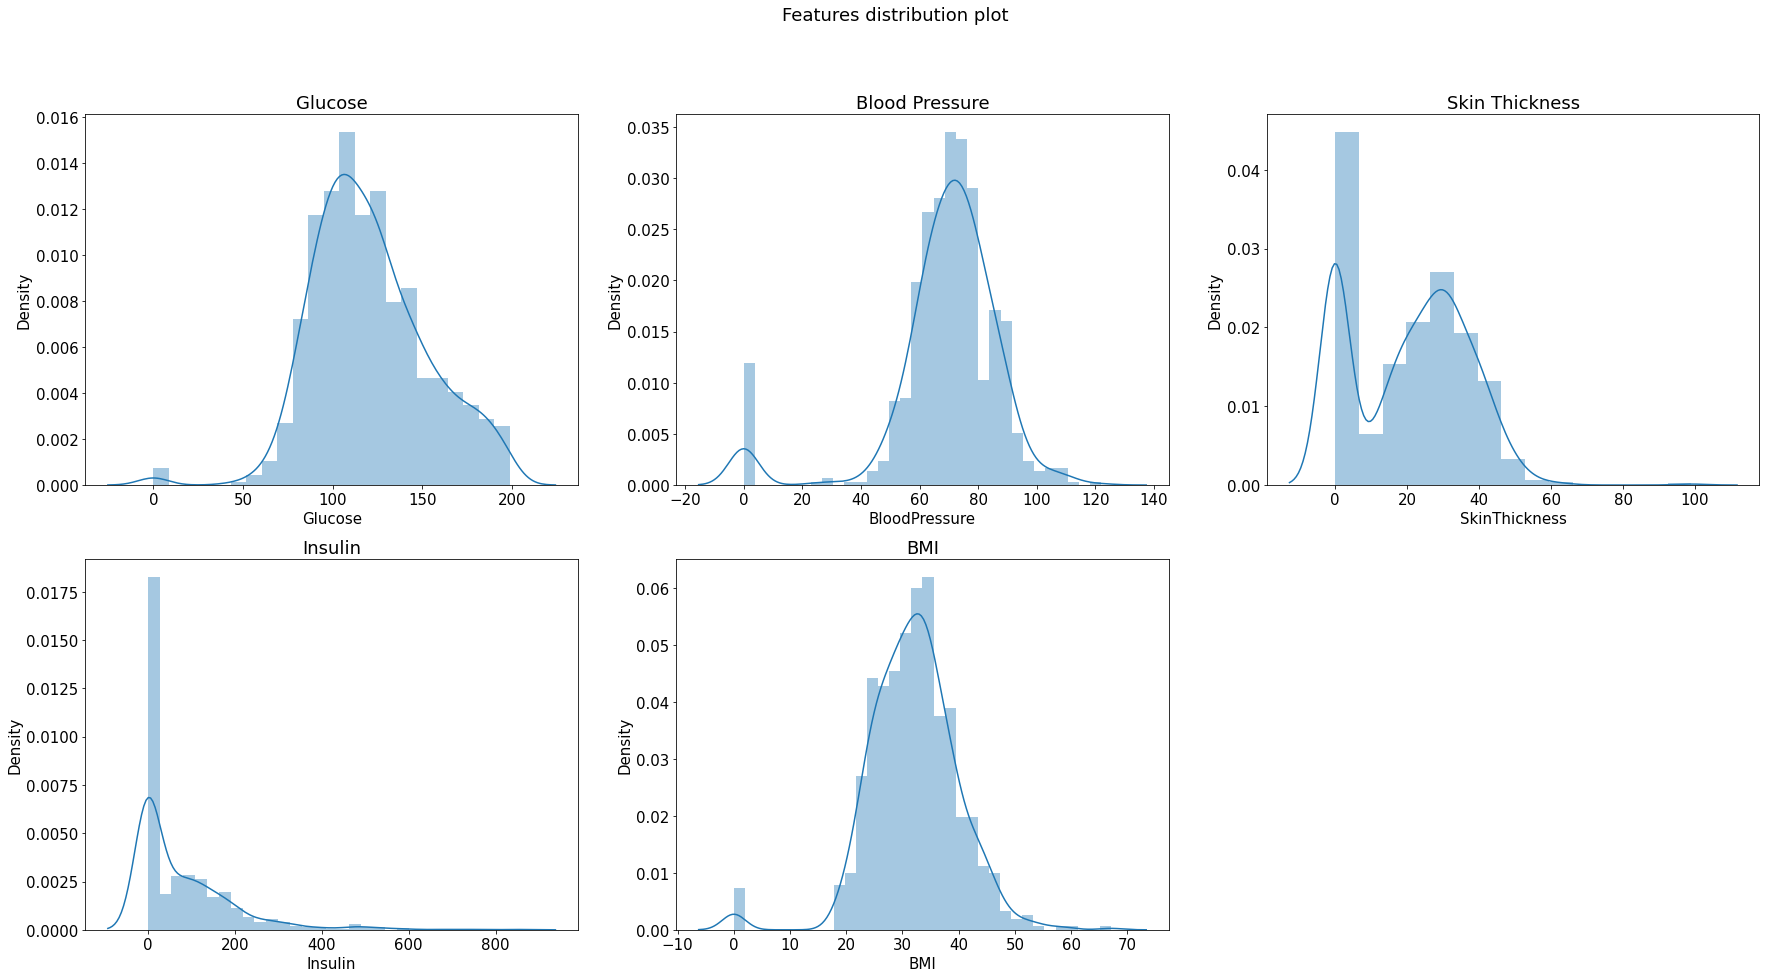

In [41]:
plt.figure(figsize = (30,15))
plt.rc('font', size=15)
plt.subplot(2,3,1)
sns.distplot(df['Glucose'])
plt.title('Glucose')

plt.subplot(2,3,2)
sns.distplot(df['BloodPressure'])
plt.title('Blood Pressure')

plt.subplot(2,3,3)
sns.distplot(df['SkinThickness'])
plt.title('Skin Thickness')

plt.subplot(2,3,4)
sns.distplot(df['Insulin'])
plt.title('Insulin')

plt.subplot(2,3,5)
sns.distplot(df['BMI'])
plt.title('BMI')

plt.suptitle('Features distribution plot')
plt.show()

#### Q4: Creation of Boxplot and detection of outliers. Which feature has maximum outliers ?

<AxesSubplot:>

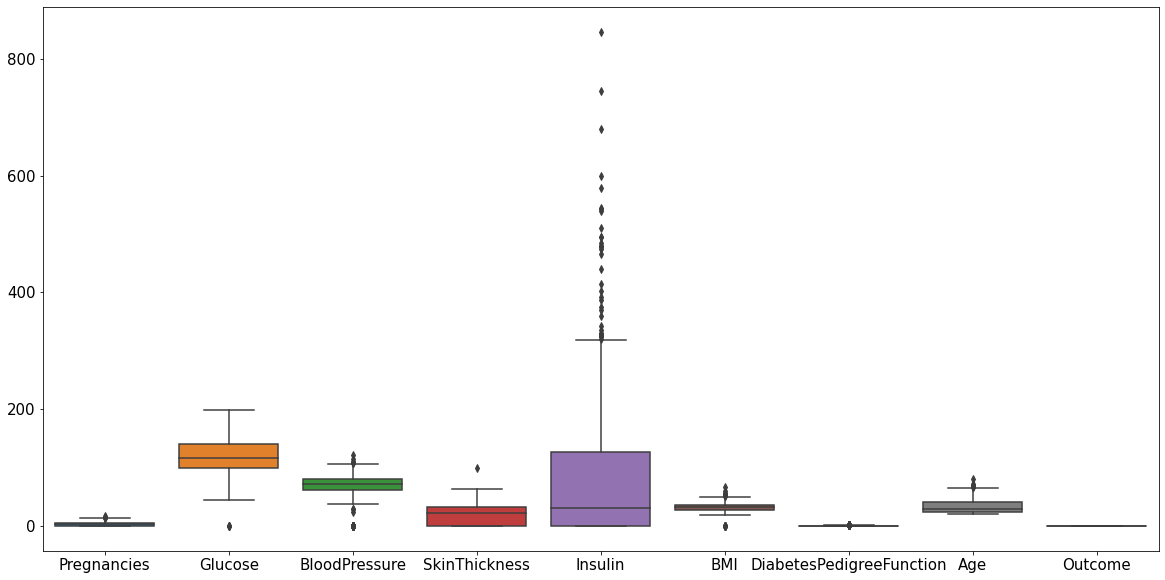

In [45]:
fig,ax = plt.subplots(figsize=(20,10))
sns.boxplot(data = df, ax =ax)

### Answer:
#### Insluin has the maximum number of outliers per the Boxplot.

#### Q5: Is these records are balance or imbalance to deal with classification task. Create a bar plot for the same

In [46]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:>

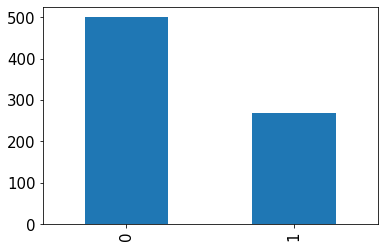

In [47]:
df['Outcome'].value_counts().plot(kind='bar')

### Answer:
#### The dats is kind of balanced.

#### Q6: Create a correlation matrix and talk about highly correlated features.

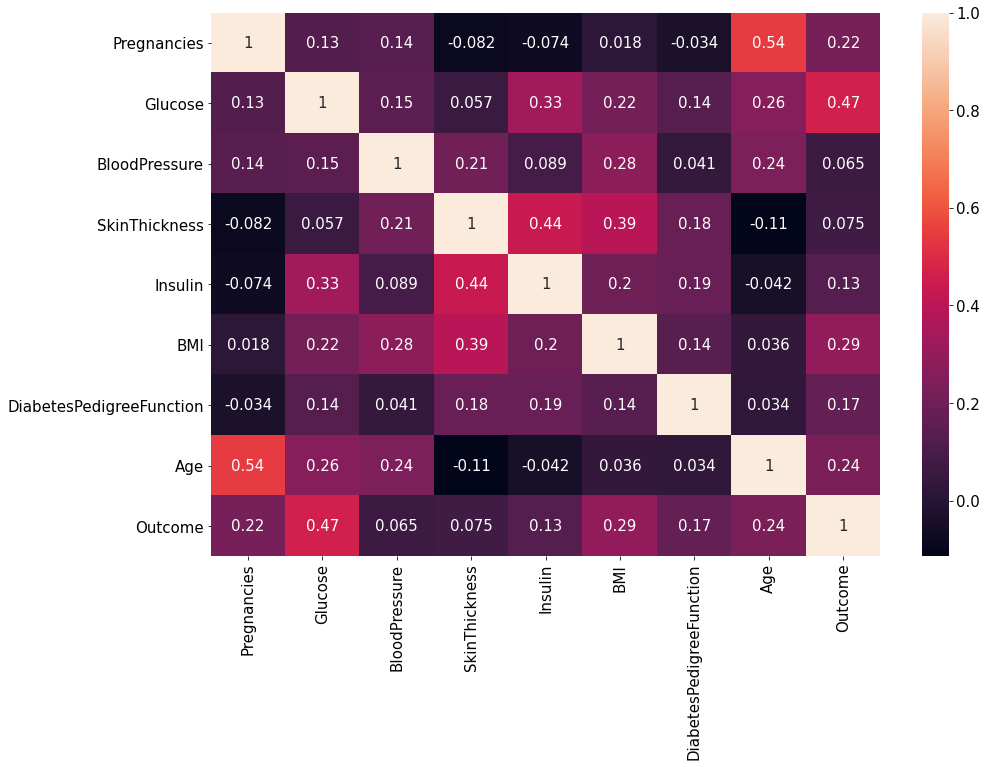

In [51]:
plt.figure(figsize=(15,10))
plt.rc('font', size=15)
df_corr = sns.heatmap(df.corr(),annot=True)
plt.show()

### Answer:
#### Standard Threshold :  >(0.80) for positive correlation and < (-0.80) for negative correlation.
#### As per the observation, we have no such correlation according to the standard threshold.

### Data imputation for '0' values

As per the distribution plot we found the features which are skwed and normal in nature.
Based on those we are going to impute the values with mean for normal and median for skwed distributions.

In [54]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].median())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

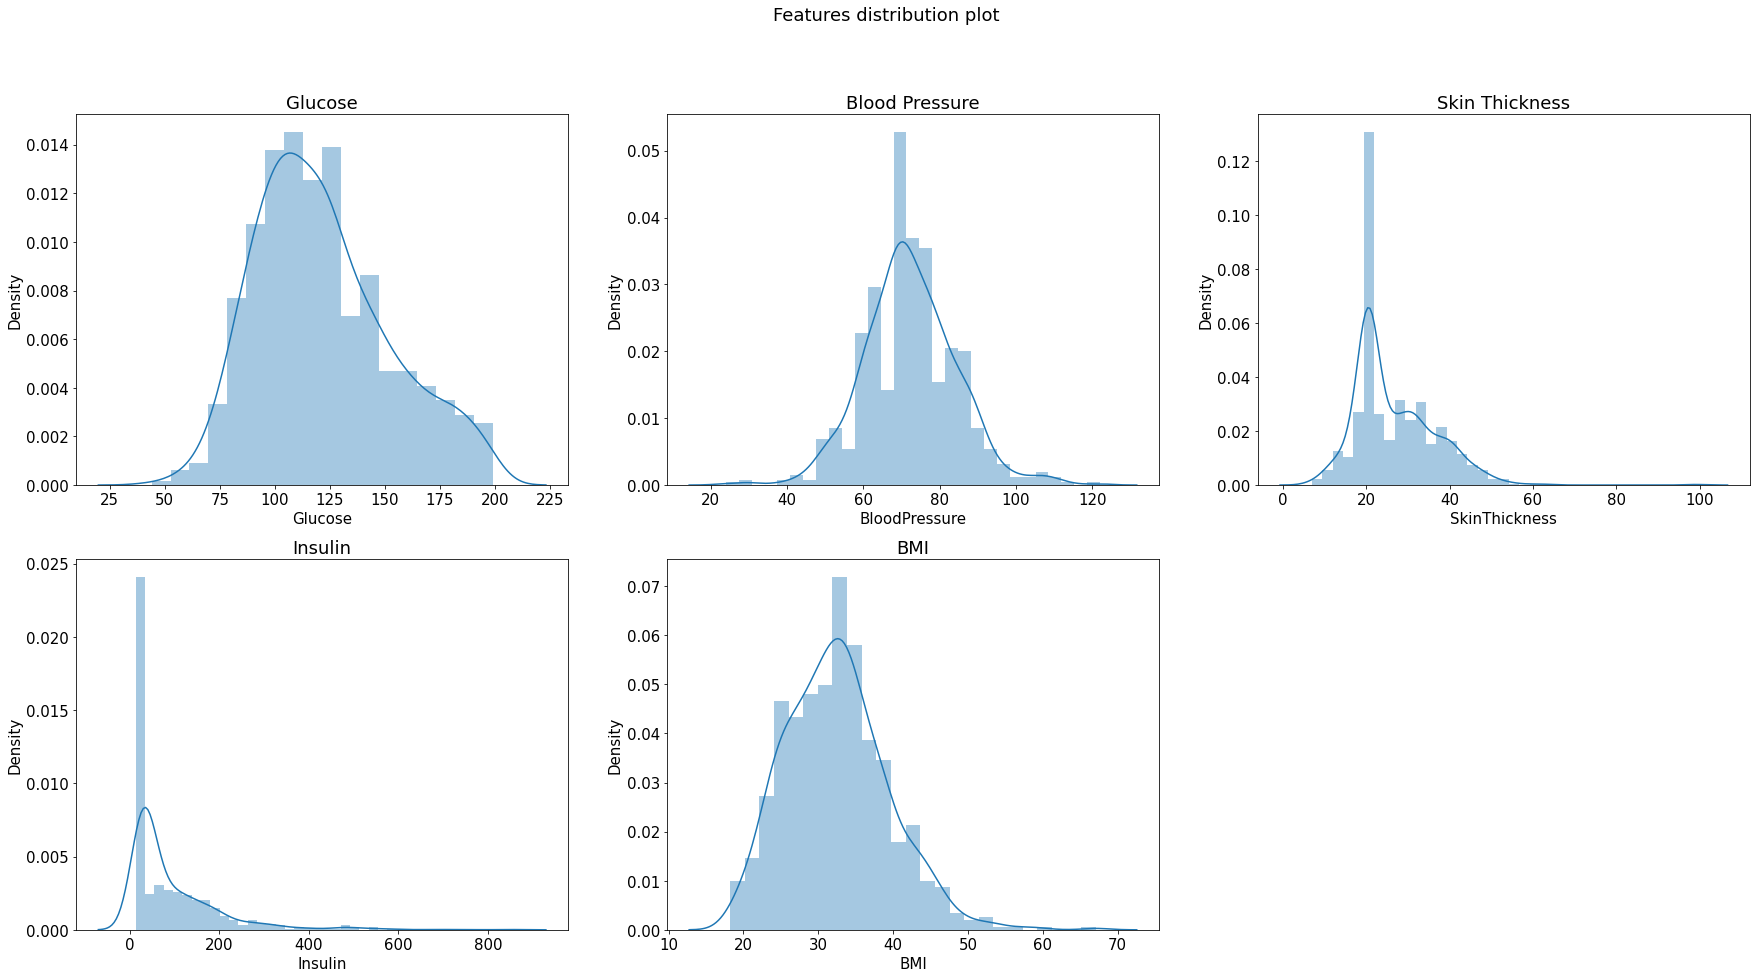

In [55]:
# Create Distribution to find the dataset enhance after imputation
plt.figure(figsize = (30,15))
plt.rc('font', size=15)
plt.subplot(2,3,1)
sns.distplot(df['Glucose'])
plt.title('Glucose')

plt.subplot(2,3,2)
sns.distplot(df['BloodPressure'])
plt.title('Blood Pressure')

plt.subplot(2,3,3)
sns.distplot(df['SkinThickness'])
plt.title('Skin Thickness')

plt.subplot(2,3,4)
sns.distplot(df['Insulin'])
plt.title('Insulin')

plt.subplot(2,3,5)
sns.distplot(df['BMI'])
plt.title('BMI')

plt.suptitle('Features distribution plot')
plt.show()

### Removing outliers

<AxesSubplot:>

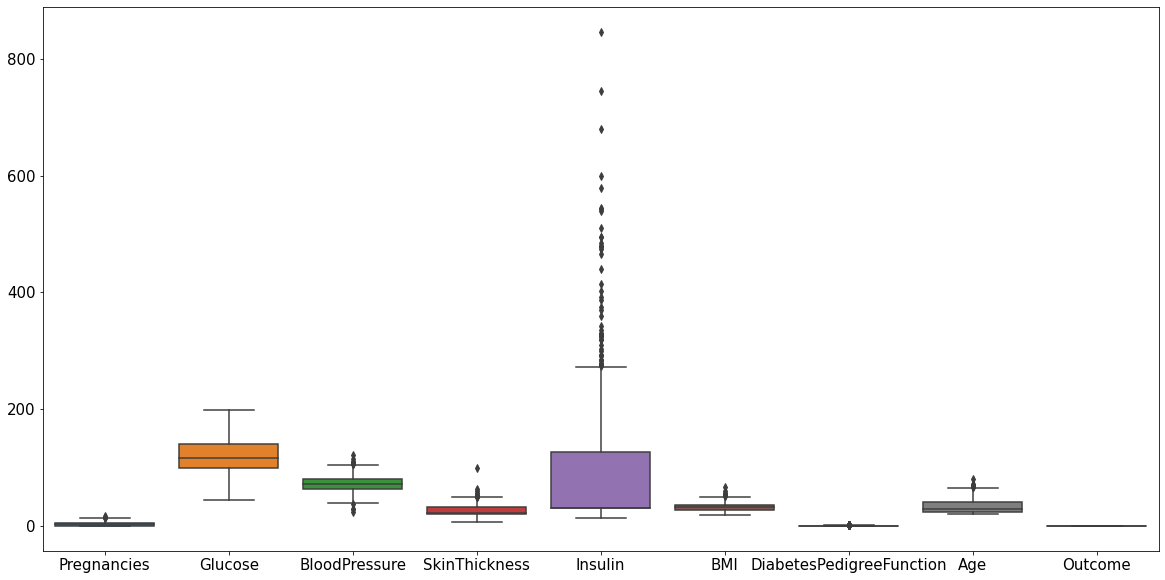

In [56]:
# Create box plot to identify the features with outliers
fig,ax = plt.subplots(figsize=(20,10))
sns.boxplot(data = df, ax =ax)

#### Outliers will be removed using the quantile method based on percentage level.
- 1st quantile covers 68% fo data
- 2nd quantile covers 95% fo data
- 3rd quantile covers 99.7% fo data

<AxesSubplot:>

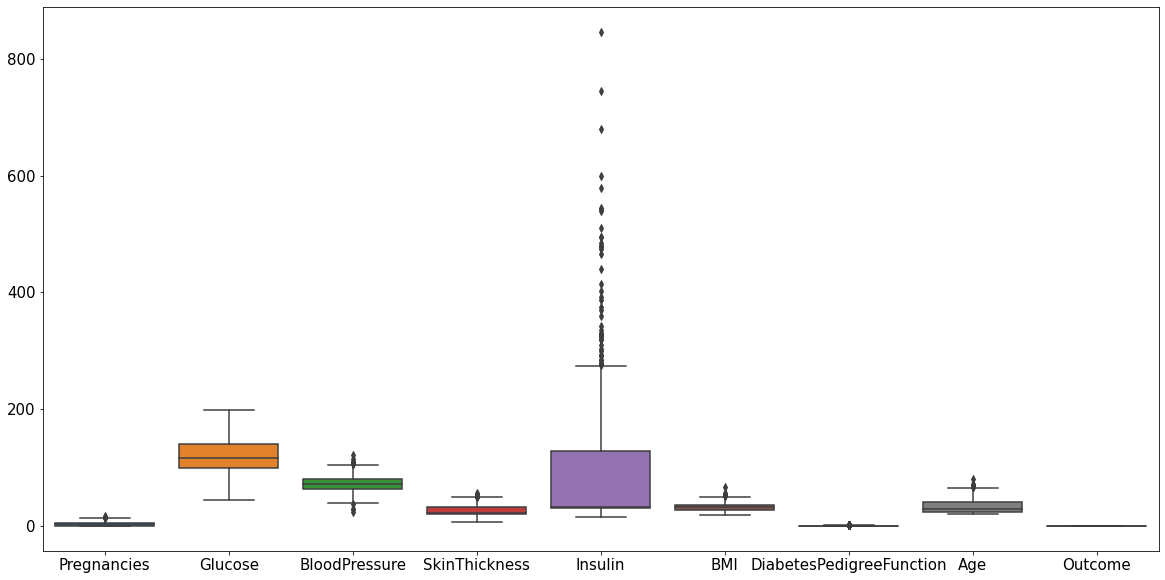

In [79]:
def removeoutlier(x):
    q = df[x].quantile(0.997)
    newdf = df[df[x]<q]

removeoutlier('Pregnancies')
removeoutlier('Glucose')
removeoutlier('BloodPressure')
removeoutlier('SkinThickness')
removeoutlier('Insulin')
removeoutlier('BMI')
removeoutlier('DiabetesPedigreeFunction')
removeoutlier('Age')

fig,ax = plt.subplots(figsize=(20,10))
sns.boxplot(data = newdf, ax =ax)